# Decision Tree Training

* Imports and Libraries

In [1]:
#Global imports
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as mp
import matplotlib.pyplot as plt
from pandas import DataFrame, read_csv
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn import tree
from sklearn.preprocessing import Normalizer, StandardScaler, MinMaxScaler
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

* Functions Definition

In [2]:
def convertSex():
    df['Sex'] = df['Sex'].map({'M': 0, 'F': 1, 'I': 2})

def multiply_by_Scalar(conv_array, scalar):
    for i in conv_array:
        df[i] = df[i].apply(lambda x: x*scalar)

def treat_data():
    global df
    df.round()
    df=df.apply(np.int64)

def prune(tree):
    dat = tree.tree_
    nodes = range(0, dat.node_count)
    for i in nodes:
        dat.threshold[i]=int(dat.threshold[i])
    ls = dat.children_left
    rs = dat.children_right
    classes = [[list(e).index(max(e)) for e in v] for v in dat.value]

    leaves = [(ls[i] == rs[i]) for i in nodes]

    LEAF = -1
    for i in reversed(nodes):
        if leaves[i]:
            continue
        if leaves[ls[i]] and leaves[rs[i]] and classes[ls[i]] == classes[rs[i]]:
            ls[i] = rs[i] = LEAF
            leaves[i] = True
    return tree


* Load Dataset

In [3]:
f = 'abalone.data'
sep = ','
df = read_csv(f, sep, header = None)
df.columns = ['Sex','Length','Diameter','Height','Whole Weight', 'Shucked Weight','Viscera Weight','Shell Weight','Rings']

## Feature Data Visualization

* Ten random Samples to see the data that exists in the dataset

In [4]:
df.sample(10)

,Sex,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
2049,I,0.445,0.320,0.120,0.3780,0.1520,0.0825,0.1200,8
974,F,0.530,0.425,0.130,0.7585,0.3250,0.1970,0.2050,8
3509,F,0.645,0.520,0.175,1.3345,0.6670,0.2665,0.3550,10
1901,M,0.575,0.435,0.135,0.9920,0.4320,0.2225,0.2390,10
1623,F,0.565,0.440,0.150,0.8630,0.4350,0.1490,0.2700,9
1768,I,0.435,0.300,0.120,0.5965,0.2590,0.1390,0.1645,8
3916,F,0.520,0.410,0.160,0.7120,0.2845,0.1530,0.2250,10
797,M,0.440,0.335,0.110,0.3940,0.1570,0.0960,0.1220,9
2860,F,0.720,0.550,0.180,1.5200,0.6370,0.3250,0.4350,10
1137,F,0.575,0.450,0.160,1.0680,0.5560,0.2140,0.2575,10


* With the description of the dataset is possible to infer about the data

In [5]:
df.describe()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


* Is also very important to know about the tipe of data we are dealing with 

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
Sex               4177 non-null object
Length            4177 non-null float64
Diameter          4177 non-null float64
Height            4177 non-null float64
Whole Weight      4177 non-null float64
Shucked Weight    4177 non-null float64
Viscera Weight    4177 non-null float64
Shell Weight      4177 non-null float64
Rings             4177 non-null int64
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


## Scatter Plots

<Figure size 864x720 with 0 Axes>

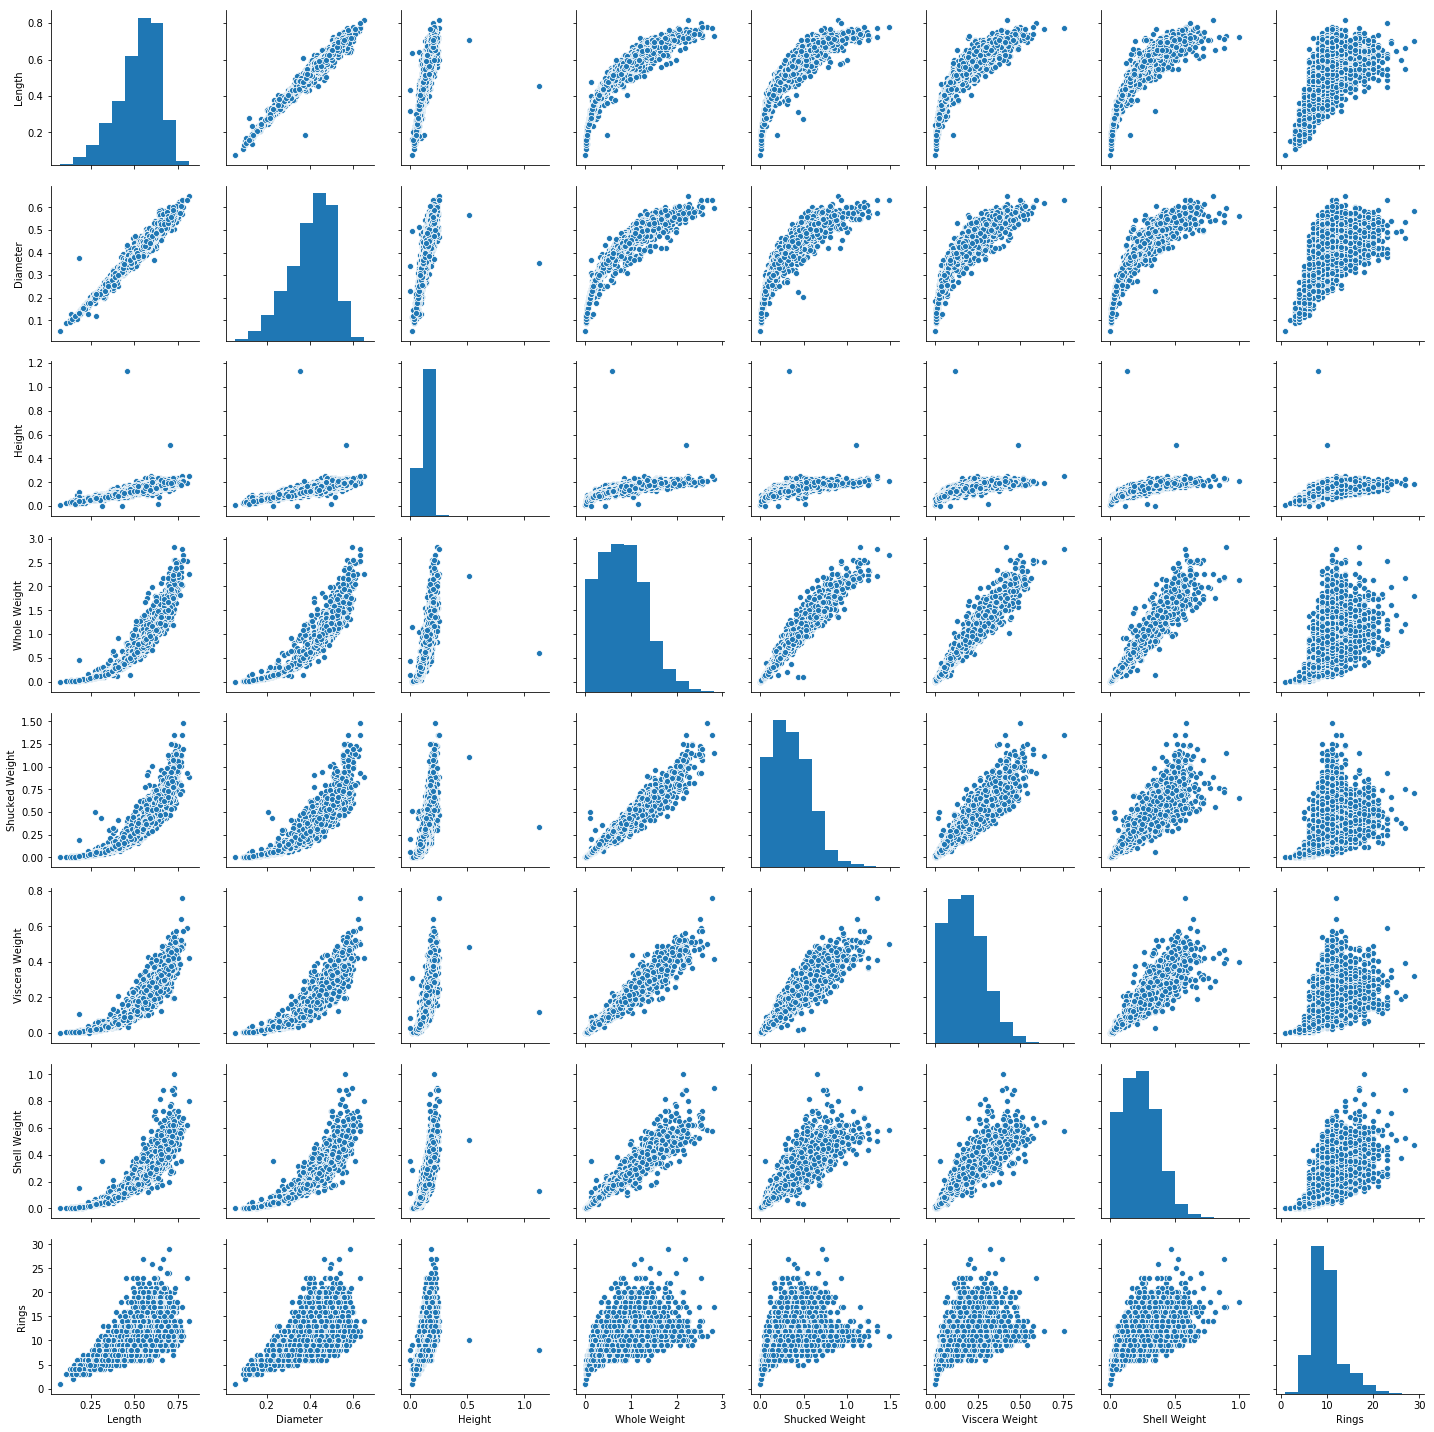

In [7]:
plt.figure(figsize=(12,10))
sns.pairplot(df)

* The Scatter Plots shows:
    * "Length" and "Diameter" show linear correlation
    * "Length" and "Weight" are quadratic correlated
    * "Whole Weight" is linearly correlated with other weight features
    * Number of Rings is positively corelated with almost all quadratic features
    * In "Height" there are null values (Height = 0) and outliers near 0.4
    * The data mostly cover the values for Rings from 3 to little over 20

## Correlation Matrix

In [8]:
df.corr()

,Length,Diameter,Height,Whole Weight,Shucked Weight,Viscera Weight,Shell Weight,Rings
Length,1.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706,0.556720
Diameter,0.986812,1.000000,0.833684,0.925452,0.893162,0.899724,0.905330,0.574660
Height,0.827554,0.833684,1.000000,0.819221,0.774972,0.798319,0.817338,0.557467
Whole Weight,0.925261,0.925452,0.819221,1.000000,0.969405,0.966375,0.955355,0.540390
Shucked Weight,0.897914,0.893162,0.774972,0.969405,1.000000,0.931961,0.882617,0.420884
Viscera Weight,0.903018,0.899724,0.798319,0.966375,0.931961,1.000000,0.907656,0.503819
Shell Weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,1.000000,0.627574
Rings,0.556720,0.574660,0.557467,0.540390,0.420884,0.503819,0.627574,1.000000


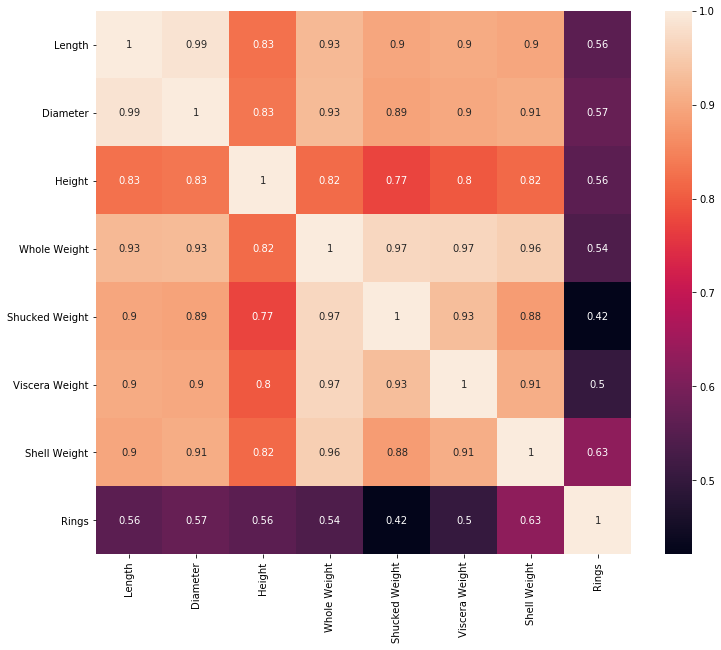

In [9]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr(), annot=True)

* As seen on the matrix/table above:
    * The correlations observed in the scatter plots match
    * From all the features excluding rings, height is least correlated with other features
    
* Feature correlation can have negative effect on the modelling phase so it should be dealt with after this type of analysis. The easiest way is to delete or eliminate one of the perfectly correlated features. Another way is to use a dimension reduction algorithm such as Principle Component Analysis (PCA).

## Categorical Feature

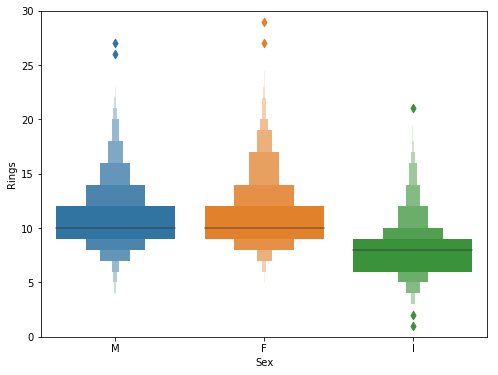

In [10]:
f, ax = plt.subplots(figsize=(8, 6))
fig = sns.boxenplot(x='Sex', y="Rings", data=df)
fig.axis(ymin=0, ymax=30);

* Examining the distribution of the Rings trough the Sex is possible to see that:
    * Distribution between Male and Female is similar
    * Most of the Rings both for Male and Female are between 8 and 19
    * Infants have mostly from 5 to 10 Rings
    * Rings majority lies between 3 to 22, as mentioned previously.

## Outliers Removal and Dataset Reduction

* Applying the filters previously mentioned, the results are:

<Figure size 864x720 with 0 Axes>

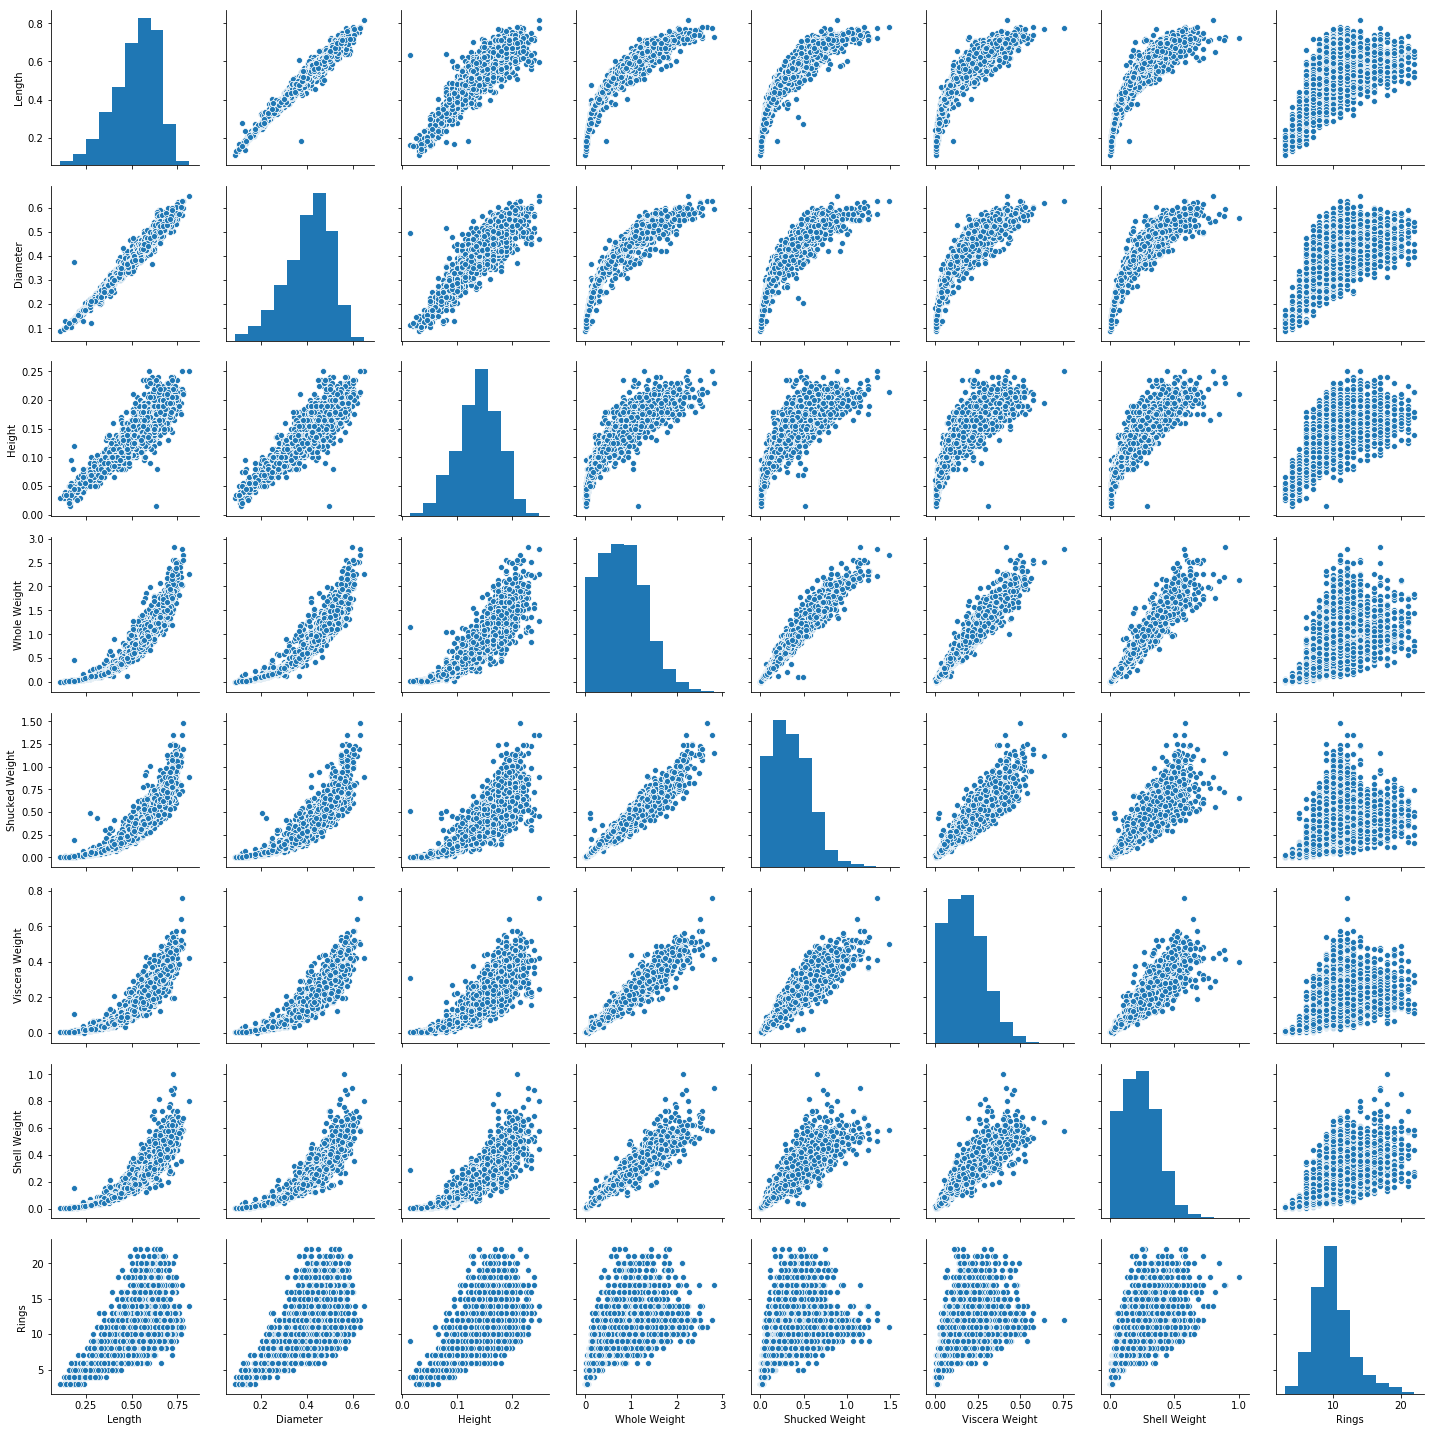

In [11]:
#Eliminate zeros and outliers
df = df[df.Height > 0]
df = df[df.Height < 0.4]
df = df[df.Rings >= 3]
df = df[df.Rings <= 22]

plt.figure(figsize=(12,10))
sns.pairplot(df)

## Data Normalization

* Scale Data using Mean Normalization since it gives better results

In [12]:
for label in ['Length','Diameter','Height','Whole Weight', 'Shucked Weight','Viscera Weight','Shell Weight']:
    df[label] = df[label].apply(lambda x: abs(x-(df[label].mean()/(df[label].max()-df[label].min()))))

## Data Scale and Remaping for Training

* Using the functions defined previously, the data is converted from objects and floant to integers

In [13]:
convertSex()
multiply_by_Scalar(['Length','Diameter','Height','Whole Weight', 'Shucked Weight','Viscera Weight','Shell Weight'], 10000)
treat_data()

* In order for the data to be better distributed between the classes 'Young' and 'Old', the threshold value was established in 9 
* After the output classification, the columns were reorganizes

In [14]:
df['Age']= df.Rings
df['Age'] = df['Age'].map(lambda x: 'Young' if x<=9 else 'Old')

df=df.drop(columns='Rings')
df = df[['Age','Sex','Length','Diameter','Height','Whole Weight', 'Shucked Weight','Viscera Weight','Shell Weight']]

## Induction

* Consists in the division of the dataset in test and train parts and  the creation of the model

In [15]:
#Induction
X = df.values[:, 1:9]
Y = df.values[:,0]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.1, random_state=11)

model = DecisionTreeClassifier(criterion = 'gini', splitter='best', max_depth=20, min_samples_leaf=50, random_state=11)

#Training
model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=20,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=50, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=11,
            splitter='best')

* First tests without the model reduction algorithm (Pruning)

In [16]:
#Cross validation
cross_score = cross_val_score(model, X_train, y_train, cv=5)
print('cross score: ', cross_score)

cross score:  [0.76101469 0.80106809 0.7523427  0.78045515 0.7643909 ]


In [17]:
#Tests without pruning
y_pred = model.predict(X_test)
print ("Accuracy is ", accuracy_score(y_test,y_pred)*100)
CM=confusion_matrix(y_test,y_pred)
print("Accuracy with Confusion Matrix ", (CM.trace())/(CM.sum())*100)

Accuracy is  81.00961538461539
Accuracy with Confusion Matrix  81.00961538461539


## Pruning

* Consists in removing the nodes that don't contribute to the cost function of the tree
* It was used the function previously defined

In [18]:
#Pruning
prunedTree= prune(model)

In [19]:
#Tests with pruning
pruned_y_pred = prunedTree.predict(X_test)
print ("Pruned Accuracy is ", accuracy_score(y_test,pruned_y_pred)*100)
pruned_CM=confusion_matrix(y_test,pruned_y_pred)
print("Pruned Accuracy with Confusion Matrix ", (pruned_CM.trace())/(pruned_CM.sum())*100)

Pruned Accuracy is  81.00961538461539
Pruned Accuracy with Confusion Matrix  81.00961538461539


* The pruning algorithm proves to be efective since the accuracy of the model stays the same with a significative reduction of the tree

## Model Export

* Export of the tree models (Original and Pruned) to dot files

In [20]:
dot_data = tree.export_graphviz(model, out_file='tree.dot', feature_names=['Sex','Length','Diameter','Height','Whole Weight', 'Shucked Weight','Viscera Weight','Shell Weight'], label= 'None', class_names=df.Age, filled=False, rounded=False, special_characters=False)
pruned_dot_data = tree.export_graphviz(prunedTree, out_file='pruned_tree.dot', feature_names=['Sex','Length','Diameter','Height','Whole Weight', 'Shucked Weight','Viscera Weight','Shell Weight'], label= 'None', class_names=df.Age, filled=False, rounded=False, special_characters=False)